In [ ]:
#Heroku link
https://vacationgeneticalgo.herokuapp.com/

In [22]:
#Individual formula to evaluate the parameters generated by the GA
def individual(vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq):

   return (vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)+(foodprice*foodFreq)

individual(5,255.73844637504405, 4.924704741126783, 272.408002947882, 9.207290921836606, 96.10704110620101, 44.26635604971811, 10.075835269539013)

3951.1272141549566

<AxesSubplot:xlabel='Generation', ylabel='Fitness'>

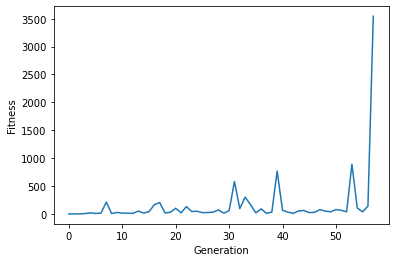

In [13]:
### Method 1 : Mutation by 2% ###


import pandas as pd
import seaborn as sns
from random import randint
import random

#Individual formula to evaluate the parameters generated by the GA
def individual(vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq):

   return (vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)+(foodprice*foodFreq)

#Fitness function 
def fitness(moneyTarget,vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq): 
   moneyused = ((vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)) +(foodprice*foodFreq)
   total = moneyTarget - moneyused

   if total <0: # if the money being used is more thanthe target
      return -99999
   elif (total == 0) and (moneyused == 5000): #if the money used is exactly 5000
      return 99999
  
   else: #positive fitness value 
      return abs(1/total)


#Population/generate solutions for fitness
solutions= []
for i in range(1000):
   solutions.append( (
                      random.uniform(1,300),#hotelStarRating ~ Price
                      random.uniform(1,6),#touristSpot
                      random.uniform(1,300),#oneTouristSpot
                      random.uniform(1,10),#transportFreq
                      random.uniform(1,100), #transportFees
                      random.uniform(1,50),#foodprice
                      random.uniform(1,20)  ))#food frequency                       


#Lists to use for streamlit
generationList = []
fitnessList = []

#sort the solutions from worse to best
for i in range(10000):
   rankedSolutions = []
   for s in solutions:
      rankedSolutions.append((fitness(5000,5,s[0],s[1],s[2],s[3],s[4],s[5],s[6]),s))
   rankedSolutions.sort()
   rankedSolutions.reverse()
   # print(f"=== Gen{i} best solutions === ")
   # print(rankedSolutions[0])

   generationList.append(i)

   fitnessList.append(rankedSolutions[0][0])

#break out of the loop if the solution is good enough 

   if rankedSolutions[0][0] > 999:
      break

   bestSolutions = rankedSolutions[:100] #100 best solution

   
   elements = [] # hold the best parameters in a list 
   for s in bestSolutions:
      x =[]
      x.append(s[1][0])
      x.append(s[1][1])
      x.append(s[1][2])
      x.append(s[1][3])
      x.append(s[1][4])
      x.append(s[1][5])
      x.append(s[1][6])
      elements.append(x)

   
   hotelStarList,touristList,oneTouristList,transportFreqList,transportFeesList,foodPriceList,foodFreqList = ([] for i in range(7))
 
   for i in elements: #extract the parameters and put it inside a unique list for their values

      hotelStarList.append(i[0])
      touristList.append(i[1])
      oneTouristList.append(i[2])
      transportFreqList.append(i[3])
      transportFeesList.append(i[4])
      foodPriceList.append(i[5])
      foodFreqList.append(i[6])

   newGen = []

   #Mutation by 2%
   for a in range(5000):
      e1 = random.choice(hotelStarList) * random.uniform(0.99,1.01)
      e2 = random.choice(touristList) * random.uniform(0.99,1.01)
      e3 = random.choice(oneTouristList) * random.uniform(0.99,1.01)
      e4 = random.choice(transportFreqList) * random.uniform(0.99,1.01)
      e5 = random.choice(transportFeesList) * random.uniform(0.99,1.01)
      e6 = random.choice(foodPriceList)* random.uniform(0.99,1.01)
      e7 = random.choice(foodFreqList)* random.uniform(0.99,1.01)
      newGen.append((e1,e2,e3,e4,e5,e6,e7))

   solutions = newGen #New solution generated

#Generate the chart using seaborn
df = pd.DataFrame(list(zip(generationList,fitnessList)),columns = ["Generation","Fitness"])
sns.lineplot(x="Generation",y="Fitness",data=df)

<AxesSubplot:xlabel='Generation', ylabel='Fitness'>

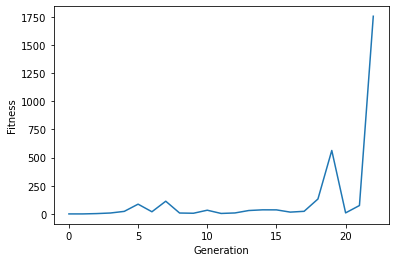

In [15]:
### Method 2 : Mutation by 4% ###


import pandas as pd
import seaborn as sns
from random import randint
import random

#Individual formula to evaluate the parameters generated by the GA
def individual(vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq):

   return (vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)+(foodprice*foodFreq)

#Fitness function 
def fitness(moneyTarget,vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq): 
   moneyused = ((vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)) +(foodprice*foodFreq)
   total = moneyTarget - moneyused

   if total <0: # if the money being used is more thanthe target
      return -99999
   elif (total == 0) and (moneyused == 5000): #if the money used is exactly 5000
      return 99999
  
   else: #positive fitness value 
      return abs(1/total)


#Population/generate solutions for fitness
solutions= []
for i in range(1000):
   solutions.append( (
                      random.uniform(1,300),#hotelStarRating ~ Price
                      random.uniform(1,6),#touristSpot
                      random.uniform(1,300),#oneTouristSpot
                      random.uniform(1,10),#transportFreq
                      random.uniform(1,100), #transportFees
                      random.uniform(1,50),#foodprice
                      random.uniform(1,20)  ))#food frequency                       


#Lists to use for streamlit
generationList = []
fitnessList = []

#sort the solutions from worse to best
for i in range(10000):
   rankedSolutions = []
   for s in solutions:
      rankedSolutions.append((fitness(5000,5,s[0],s[1],s[2],s[3],s[4],s[5],s[6]),s))
   rankedSolutions.sort()
   rankedSolutions.reverse()
   # print(f"=== Gen{i} best solutions === ")
   # print(rankedSolutions[0])

   generationList.append(i)

   fitnessList.append(rankedSolutions[0][0])

#break out of the loop if the solution is good enough 

   if rankedSolutions[0][0] > 999:
      break

   bestSolutions = rankedSolutions[:100] #100 best solution

   
   elements = [] # hold the best parameters in a list 
   for s in bestSolutions:
      x =[]
      x.append(s[1][0])
      x.append(s[1][1])
      x.append(s[1][2])
      x.append(s[1][3])
      x.append(s[1][4])
      x.append(s[1][5])
      x.append(s[1][6])
      elements.append(x)

   
   hotelStarList,touristList,oneTouristList,transportFreqList,transportFeesList,foodPriceList,foodFreqList = ([] for i in range(7))
 
   for i in elements: #extract the parameters and put it inside a unique list for their values

      hotelStarList.append(i[0])
      touristList.append(i[1])
      oneTouristList.append(i[2])
      transportFreqList.append(i[3])
      transportFeesList.append(i[4])
      foodPriceList.append(i[5])
      foodFreqList.append(i[6])

   newGen = []

   #Mutation by 4%
   for a in range(5000):
      e1 = random.choice(hotelStarList) * random.uniform(0.99,1.03)
      e2 = random.choice(touristList) * random.uniform(0.99,1.03)
      e3 = random.choice(oneTouristList) * random.uniform(0.99,1.03)
      e4 = random.choice(transportFreqList) * random.uniform(0.99,1.03)
      e5 = random.choice(transportFeesList) * random.uniform(0.99,1.03)
      e6 = random.choice(foodPriceList)* random.uniform(0.99,1.03)
      e7 = random.choice(foodFreqList)* random.uniform(0.99,1.03)
      newGen.append((e1,e2,e3,e4,e5,e6,e7))

   solutions = newGen #New solution generated

#Generate the chart using seaborn
df = pd.DataFrame(list(zip(generationList,fitnessList)),columns = ["Generation","Fitness"])
sns.lineplot(x="Generation",y="Fitness",data=df)

<AxesSubplot:xlabel='Generation', ylabel='Fitness'>

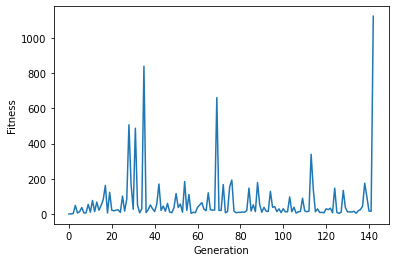

In [16]:
### Method 3 : Mutation by 5% ###


import pandas as pd
import seaborn as sns
from random import randint
import random

#Individual formula to evaluate the parameters generated by the GA
def individual(vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq):

   return (vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)+(foodprice*foodFreq)

#Fitness function 
def fitness(moneyTarget,vacationDuration,hotelStarRating,touristSpot,oneTouristSpot,transportFreq,transportFees,foodprice,foodFreq): 
   moneyused = ((vacationDuration*hotelStarRating) + (touristSpot*oneTouristSpot) + (transportFreq*transportFees)) +(foodprice*foodFreq)
   total = moneyTarget - moneyused

   if total <0: # if the money being used is more thanthe target
      return -99999
   elif (total == 0) and (moneyused == 5000): #if the money used is exactly 5000
      return 99999
  
   else: #positive fitness value 
      return abs(1/total)


#Population/generate solutions for fitness
solutions= []
for i in range(1000):
   solutions.append( (
                      random.uniform(1,300),#hotelStarRating ~ Price
                      random.uniform(1,6),#touristSpot
                      random.uniform(1,300),#oneTouristSpot
                      random.uniform(1,10),#transportFreq
                      random.uniform(1,100), #transportFees
                      random.uniform(1,50),#foodprice
                      random.uniform(1,20)  ))#food frequency                       


#Lists to use for streamlit
generationList = []
fitnessList = []

#sort the solutions from worse to best
for i in range(10000):
   rankedSolutions = []
   for s in solutions:
      rankedSolutions.append((fitness(5000,5,s[0],s[1],s[2],s[3],s[4],s[5],s[6]),s))
   rankedSolutions.sort()
   rankedSolutions.reverse()
   # print(f"=== Gen{i} best solutions === ")
   # print(rankedSolutions[0])

   generationList.append(i)

   fitnessList.append(rankedSolutions[0][0])

#break out of the loop if the solution is good enough 

   if rankedSolutions[0][0] > 999:
      break

   bestSolutions = rankedSolutions[:100] #100 best solution

   
   elements = [] # hold the best parameters in a list 
   for s in bestSolutions:
      x =[]
      x.append(s[1][0])
      x.append(s[1][1])
      x.append(s[1][2])
      x.append(s[1][3])
      x.append(s[1][4])
      x.append(s[1][5])
      x.append(s[1][6])
      elements.append(x)

   
   hotelStarList,touristList,oneTouristList,transportFreqList,transportFeesList,foodPriceList,foodFreqList = ([] for i in range(7))
 
   for i in elements: #extract the parameters and put it inside a unique list for their values

      hotelStarList.append(i[0])
      touristList.append(i[1])
      oneTouristList.append(i[2])
      transportFreqList.append(i[3])
      transportFeesList.append(i[4])
      foodPriceList.append(i[5])
      foodFreqList.append(i[6])

   newGen = []

   #Mutation by 2%
   for a in range(5000):
      e1 = random.choice(hotelStarList) * random.uniform(0.99,1.01)
      e2 = random.choice(touristList) * random.uniform(0.99,1.03)
      e3 = random.choice(oneTouristList) * random.uniform(0.99,1.03)
      e4 = random.choice(transportFreqList) * random.uniform(0.99,1.03)
      e5 = random.choice(transportFeesList) * random.uniform(0.99,1.03)
      e6 = random.choice(foodPriceList)* random.uniform(0.99,1.03)
      e7 = random.choice(foodFreqList)* random.uniform(0.99,1.03)
      newGen.append((e1,e2,e3,e4,e5,e6,e7))

   solutions = newGen #New solution generated

#Generate the chart using seaborn
df = pd.DataFrame(list(zip(generationList,fitnessList)),columns = ["Generation","Fitness"])
sns.lineplot(x="Generation",y="Fitness",data=df)